In [112]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Map

In [113]:
data=pd.read_csv("./分省年度数据.csv",encoding='gbk')

In [114]:
data=data[:-1]
data=data.drop(columns='2023年')

In [115]:
data

,地区,2022年,2021年,2020年,2019年
0,北京市,41540.9,41045.6,35943.3,35445.1
1,天津市,16132.2,15685.1,14008.0,14055.5
2,河北省,41988.0,40397.1,36013.8,34978.6
3,山西省,25583.9,22870.4,17835.6,16961.6
4,内蒙古自治区,23388.9,21166.0,17258.0,17212.5
5,辽宁省,28826.1,27569.5,25011.4,24855.3
6,吉林省,12818.1,13163.8,12256.0,11726.8
7,黑龙江省,15831.5,14858.2,13633.4,13544.4
8,上海市,44809.1,43653.2,38963.3,37987.6
9,江苏省,122089.3,117392.4,102807.7,98656.8


In [116]:
df=data.head(5)

In [117]:
df

,地区,2022年,2021年,2020年,2019年
0,北京市,41540.9,41045.6,35943.3,35445.1
1,天津市,16132.2,15685.1,14008.0,14055.5
2,河北省,41988.0,40397.1,36013.8,34978.6
3,山西省,25583.9,22870.4,17835.6,16961.6
4,内蒙古自治区,23388.9,21166.0,17258.0,17212.5


In [118]:
# 提取数据
years = df.columns[1:]  # 提取年份
data = df.iloc[:, 1:]

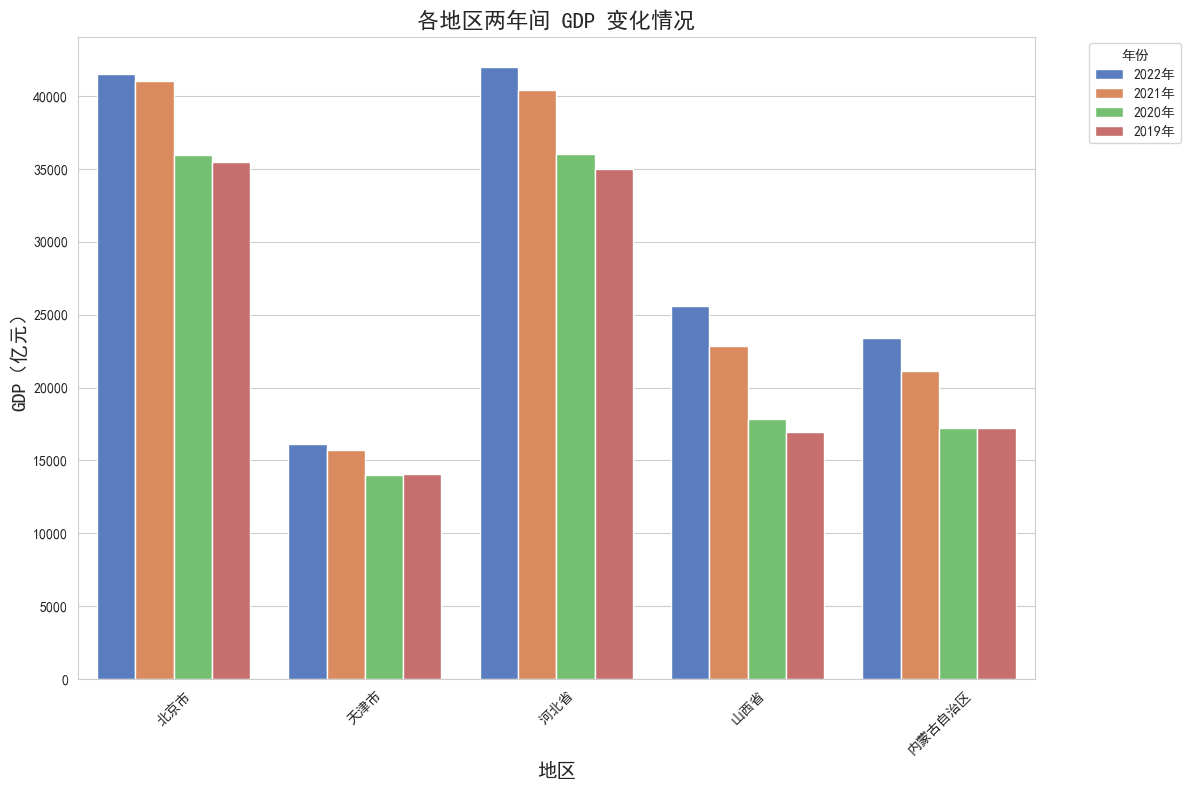

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置字体以显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 提取数据
years = df.columns[1:]  # 提取年份
data = df.iloc[:, 1:]

# 创建地区名称的字典
region_names = {
    0: '北京市',
    1: '天津市',
    2: '河北省',
    3: '山西省',
    4: '内蒙古自治区'
    # 这里继续添加其他地区的映射
}

# 替换索引为地区名称
data_with_region_names = data.reset_index()
data_with_region_names['index'] = data_with_region_names['index'].map(region_names)

# 创建图表
plt.figure(figsize=(12, 8))

# 绘制堆叠柱状图
sns.barplot(data=data_with_region_names.melt(id_vars='index'), x='index', y='value', hue='variable', palette='muted')

# 添加标题和标签
plt.title('各地区两年间 GDP 变化情况', fontsize=16)
plt.xlabel('地区', fontsize=14)
plt.ylabel('GDP（亿元）', fontsize=14)
plt.xticks(rotation=45)

# 添加图例
plt.legend(title='年份', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.tight_layout()
plt.show()


In [133]:
city_data.columns

Index(['2022年', '2021年', '2020年', '2019年'], dtype='object')

F:\TEMP\ipykernel_22764\3227044838.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=years, y=city_data.iloc[0], palette='muted')


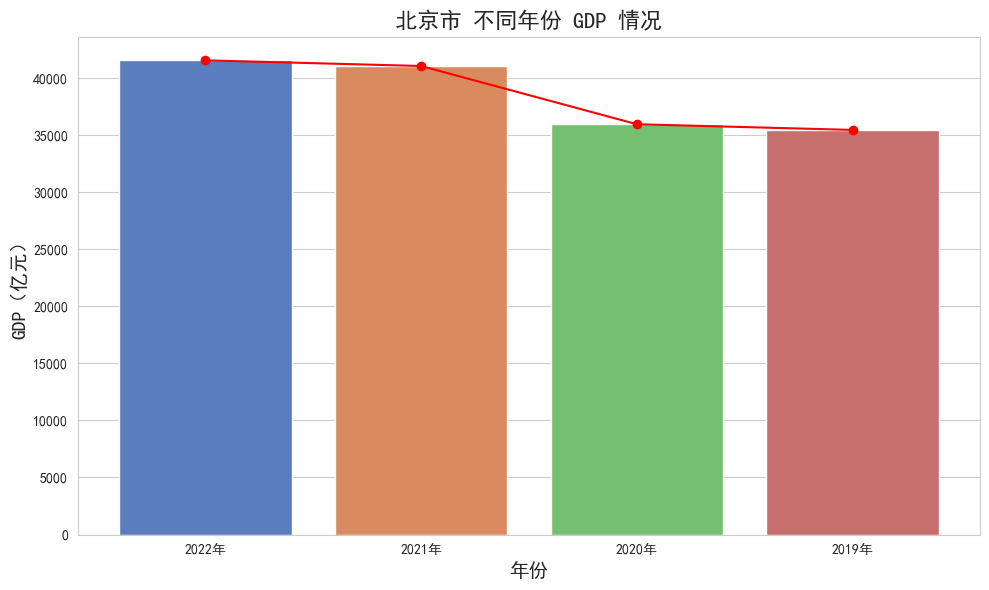

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置字体以显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 指定要绘制的城市名称
city_name = '北京市'

# 筛选出指定城市的数据
city_data = df[df['地区'] == city_name].iloc[:, 1:]

# 提取年份
years = city_data.columns

# 创建图表
plt.figure(figsize=(10, 6))

# 绘制柱状图
sns.barplot(x=years, y=city_data.iloc[0], palette='muted')

# 添加折线图
plt.plot(years, city_data.iloc[0], marker='o', color='red', linestyle='-')

# 添加标题和标签
plt.title(f'{city_name} 不同年份 GDP 情况', fontsize=16)
plt.xlabel('年份', fontsize=14)
plt.ylabel('GDP（亿元）', fontsize=14)

# 显示图表
plt.tight_layout()
plt.show()
